# Рідж регресія

## Yuriy Ryzkin

### Варіант 4

In [1]:
path_to_folder <- paste(dirname(getwd()),'/lab1/data',sep = '')
filenames = list.files(path = path_to_folder,full.names = TRUE)

In [2]:
#create list with dataframes from /data folder
datalist = lapply(filenames,
                  function (x){
                      a <- unlist(strsplit(x,'[_.]'));
                      company <- a[length(a)-1];
                      x0<- read.csv(x,header = F)[,c(1,6)];# using ol
                      colnames(x0)<-c('date',company);
                      x0;
                  })
#merge tables to one
y<-Reduce(function(x,y) {merge(x,y,by="date")}, datalist)

In [3]:
df<-y[-nrow(y),-1]
df$tomorrow_apd <- y$apd[-1]
number_rows<-nrow(df)

head(df)

,amgn,amp,amt,amzn,an,anf,aon,apa,apc,apd,tomorrow_apd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,76.6332,29.6218,24.1784,45.99,19.86,44.4525,28.5404,70.9727,45.7598,46.0207,46.3674
2,77.1332,29.2406,24.0615,44.90,19.82,43.6285,28.6119,67.7776,43.4416,46.3674,45.0466
3,75.1332,29.0327,23.4377,44.47,19.50,43.2032,28.8173,65.2821,42.0754,45.0466,44.7825
4,72.9025,28.9114,23.3305,44.03,19.30,45.8170,28.3797,62.0681,41.9374,44.7825,45.3108
5,74.0948,29.0240,23.5547,43.66,19.29,46.1359,28.4154,62.8432,42.7276,45.3108,44.8073
6,73.8929,28.6428,23.0772,43.78,19.21,45.2056,27.9508,62.4178,42.4134,44.8073,44.6422


In [5]:
data_test <- df[(number_rows-19):number_rows,]
data_model1 <- df[0:(number_rows-20),]
data_model2 <- df[(number_rows-69):(number_rows-20),]

In [7]:
library(MASS)

In [8]:
model_1 <- lm.ridge(formula = tomorrow_apd~.-apd,data = data_model1,lambda = seq(0.001,50,.01))

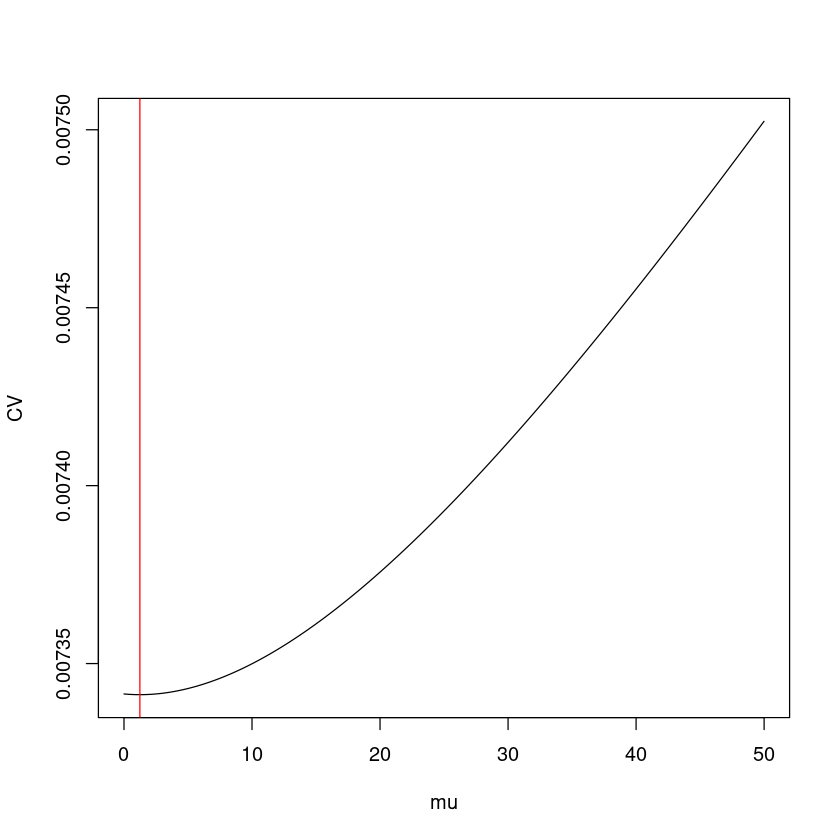

In [38]:
plot(model_1$lambda,model_1$GCV,type="l",xlab="mu",ylab="CV")
i_1<-which.min(model_1$GCV)
abline(v=model_1$lambda[i_1],col="red")

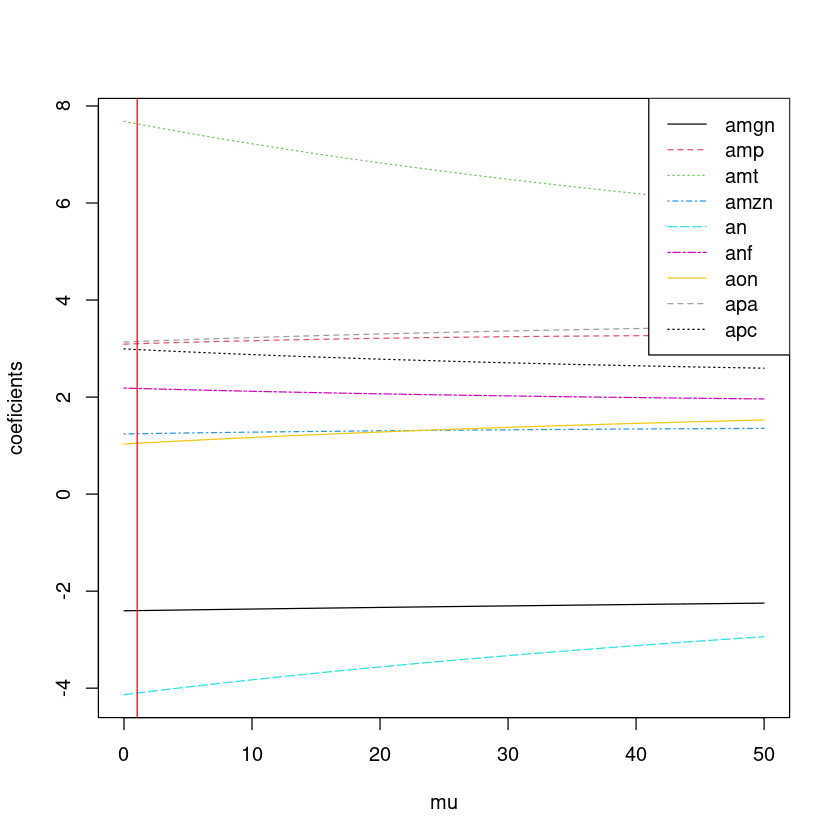

In [13]:
matplot(model_1$lambda,t(model_1$coef),type="l",col=1:9,lty=1:9,xlab="mu",ylab="coeficients")
abline(v=model_1$lambda[i],col="red")
legend("topright",col=1:9,legend=colnames(data_model1)[1:9],lty=1:9)

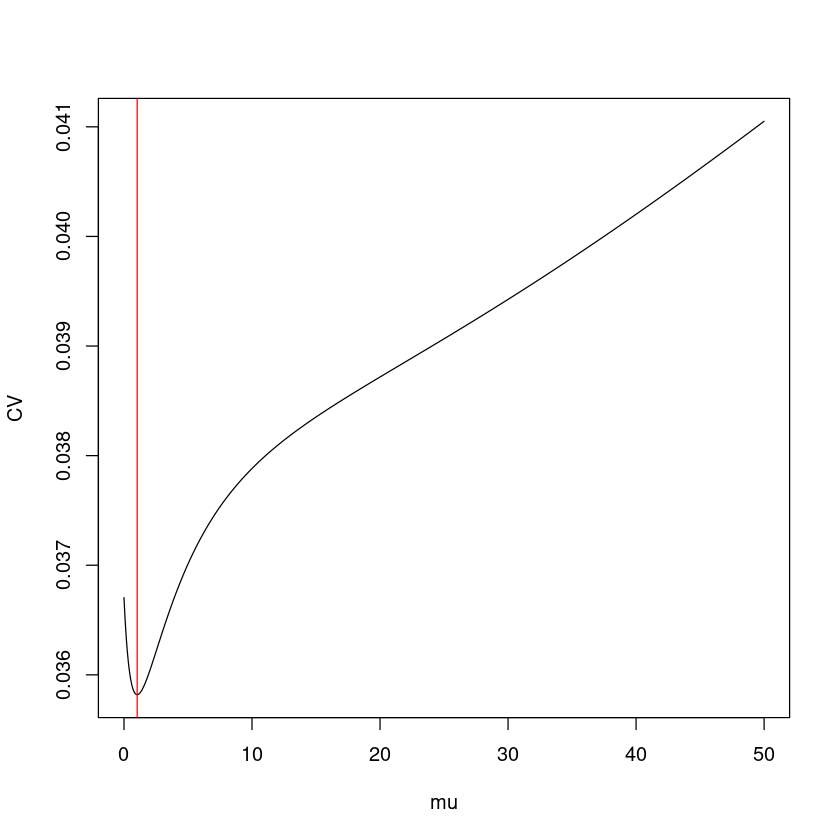

In [39]:
model_2 <- lm.ridge(formula = tomorrow_apd~.-apd,data = data_model2,lambda = seq(0.001,50,.01))
plot(model_2$lambda,model_2$GCV,type="l",xlab="mu",ylab="CV")
i_2<-which.min(model_2$GCV)
abline(v=model_2$lambda[i_2],col="red")

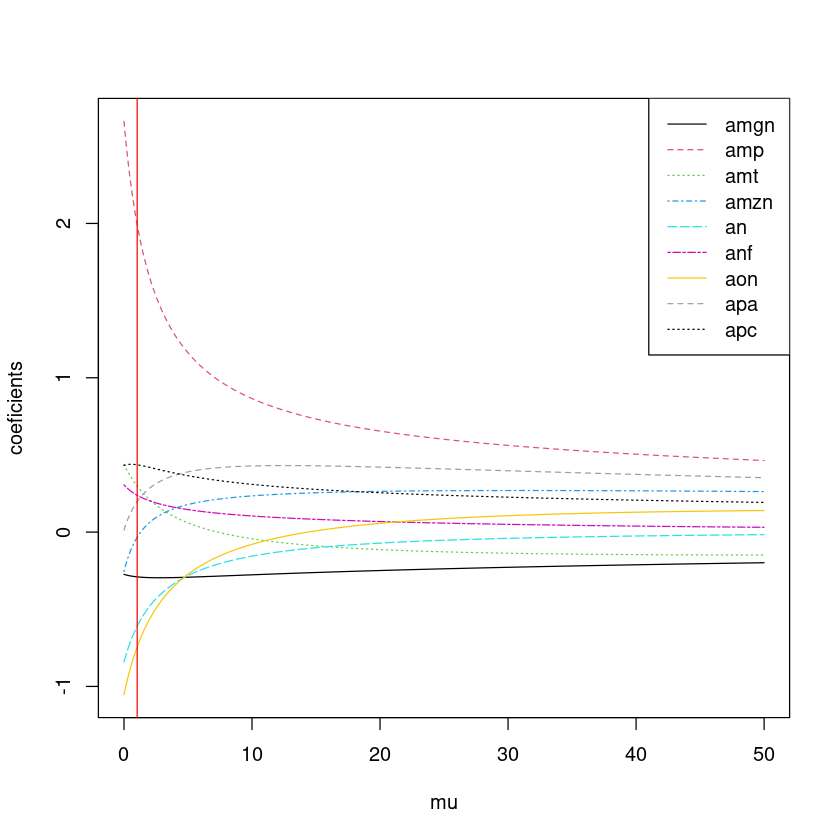

In [14]:
matplot(model_2$lambda,t(model_2$coef),type="l",col=1:8,lty=1:9,xlab="mu",ylab="coeficients")
abline(v=model_1$lambda[i],col="red")
legend("topright",col=1:9,legend=colnames(data_model2)[1:9],lty=1:9)

In [29]:
a <- data.frame(rowMeans(model_2$coef[,4800:5000]))
colnames(a) <- c('mean_coef')
a

,mean_coef
,<dbl>
amgn,-0.19975587
amp,0.46757093
amt,-0.14884591
amzn,0.26308139
an,-0.01733366
anf,0.03173674
aon,0.13897607
apa,0.35458901
apc,0.19366292


In [34]:
mean(a$mean_coef)
sd(a$mean_coef)

[1] 0.1204091

[1] 0.2245182

Давайте подивимось на наші графіки. 
З графіків залежності коефіцієнта лябда та коефіцієнт можна зробити такі висновки:
1. з першого, що значення цього не сильно добре підганяє нашу модель, тому що немає ніяких локальних мінімумів по яким можна визначити якийсь кращий параметр
2. з другого, що в цілому параметр лямбда краще впливає на значення кросвалідації, адже ми бачимо його кардинальну зміну з плином параметра лямбди 

З графіків залежності коефіцієнтів можна зробити такі висновки:
1. з першого: у нас при змінні параметра лямбда майже не змінюються коефіцієнти, що ми використовуємо (крім an та amp). 

2. з другого: при зміні параметри наші коефіцієнти зосереджуються біля 0.12 +- 0.22, що ознчає що параметр лямбда впливає на наші коефіцієнти

In [28]:
model_1$coef

,0.001,0.011,0.021,0.031,0.041,0.051,0.061,0.071,0.081,0.091,⋯,49.901,49.911,49.921,49.931,49.941,49.951,49.961,49.971,49.981,49.991
amgn,-2.404951,-2.404914,-2.404876,-2.404838,-2.404800,-2.404762,-2.404725,-2.404687,-2.404649,-2.404611,⋯,-2.247016,-2.246989,-2.246962,-2.246934,-2.246907,-2.246880,-2.246853,-2.246825,-2.246798,-2.246771
amp,3.091169,3.091254,3.091339,3.091424,3.091508,3.091593,3.091678,3.091763,3.091847,3.091932,⋯,3.277323,3.277331,3.277340,3.277348,3.277357,3.277365,3.277374,3.277382,3.277391,3.277399
amt,7.683234,7.682728,7.682222,7.681716,7.681210,7.680705,7.680199,7.679694,7.679189,7.678683,⋯,5.940008,5.939764,5.939521,5.939277,5.939034,5.938791,5.938548,5.938304,5.938061,5.937818
amzn,1.239606,1.239650,1.239695,1.239739,1.239783,1.239828,1.239872,1.239916,1.239961,1.240005,⋯,1.355311,1.355324,1.355336,1.355348,1.355360,1.355373,1.355385,1.355397,1.355409,1.355422
an,-4.133462,-4.133133,-4.132803,-4.132474,-4.132145,-4.131816,-4.131487,-4.131158,-4.130829,-4.130500,⋯,-2.940485,-2.940310,-2.940136,-2.939961,-2.939787,-2.939612,-2.939438,-2.939264,-2.939089,-2.938915
anf,2.185587,2.185513,2.185439,2.185364,2.185290,2.185216,2.185141,2.185067,2.184993,2.184919,⋯,1.961761,1.961735,1.961710,1.961684,1.961658,1.961632,1.961606,1.961581,1.961555,1.961529
aon,1.033230,1.033376,1.033522,1.033668,1.033814,1.033960,1.034106,1.034252,1.034398,1.034543,⋯,1.528011,1.528077,1.528143,1.528209,1.528275,1.528341,1.528407,1.528473,1.528539,1.528605
apa,3.135847,3.135948,3.136048,3.136149,3.136249,3.136350,3.136450,3.136550,3.136651,3.136751,⋯,3.454317,3.454356,3.454395,3.454434,3.454472,3.454511,3.454550,3.454589,3.454628,3.454666
apc,2.992865,2.992733,2.992601,2.992470,2.992338,2.992207,2.992075,2.991944,2.991813,2.991681,⋯,2.595733,2.595687,2.595642,2.595596,2.595551,2.595505,2.595460,2.595414,2.595369,2.595323


In [40]:
coefs_1 <-matrix(model_1$coef[,i_1]/model_1$scales,ncol=1)
coefs_2 <-matrix(model_2$coef[,i_2]/model_2$scales,ncol=1)

In [47]:
coefs_1

-0.17064809
0.23132613
0.51120131
0.01635956
-0.39470045
0.13676111
0.13119239
0.16242631
0.19737884


In [58]:
predict_1 <- as.vector(as.matrix(data_test[,1:9])%*%coefs_1) - as.vector((t(coefs_1)%*%model_1$xm)+model_1$ym)
predict_1

[1] -48.69158 -49.90378 -51.11506 -51.14483 -50.13606 -49.83756 -50.93140
 [8] -50.79678 -51.73915 -52.52055 -52.43119 -52.98002 -52.90309 -54.01766
[15] -52.97929 -53.06543 -52.46600 -53.13930 -55.35162 -54.45793

In [56]:
predict_2 <- as.vector(as.matrix(data_test[,1:9])%*%coefs_2) - as.vector((t(coefs_2)%*%model_2$xm)+model_2$ym)
predict_2

[1] -90.15004 -91.14520 -91.83197 -91.45880 -90.17140 -90.11689 -90.37044
 [8] -90.54700 -91.08177 -90.82234 -90.63326 -90.44308 -90.39906 -91.00773
[15] -90.03599 -90.05847 -89.62499 -90.79788 -91.55933 -90.98517

In [67]:
model_all <-lm(tomorrow_apd~.-tomorrow_apd-apd,data=df[(number_rows-50):number_rows,])
summary(model_all)


Call:
lm(formula = tomorrow_apd ~ . - tomorrow_apd - apd, data = df[(number_rows - 
    50):number_rows, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4701 -0.9844 -0.2693  1.2882  6.7459 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 94.76930   28.01091   3.383 0.001586 ** 
amgn         0.50324    0.14089   3.572 0.000923 ***
amp          1.93001    0.44679   4.320 9.68e-05 ***
amt         -0.14082    0.20870  -0.675 0.503606    
amzn        -0.07957    0.04901  -1.623 0.112171    
an          -0.15408    0.41761  -0.369 0.714062    
anf         -0.10216    0.32151  -0.318 0.752286    
aon         -1.36207    0.57489  -2.369 0.022615 *  
apa         -0.15864    0.23441  -0.677 0.502359    
apc         -0.70754    0.31802  -2.225 0.031656 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.926 on 41 degrees of freedom
Multiple R-squared:  0.8955,	Adjusted R-squared:  0.8725 
F-statistic: 39.0

In [61]:
data_model2 <- df[(number_rows-69):(number_rows-20),]
data_model2_X_train <- data_model2[,1:9]
data_model2_Y_train <- data_model2[,11]
PC_2 <- princomp(data_model2_X_train,cor =  T)
summary(PC_2)

data2 <- data.frame(PC_2$scores)

colnames(data2) <- c('first','second','third','forth','5','6','7','8','9')

model_PC2 <- lm(data_model2_Y_train~first+second+third+forth,data = data2)
summary(model_PC2)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.9706957 1.8174491 0.82283239 0.73265507 0.53669983
Proportion of Variance 0.4315157 0.3670135 0.07522813 0.05964261 0.03200519
Cumulative Proportion  0.4315157 0.7985292 0.87375736 0.93339997 0.96540516
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.37925394 0.271733883 0.222747023 0.209915463
Proportion of Variance 0.01598151 0.008204367 0.005512915 0.004896056
Cumulative Proportion  0.98138666 0.989591029 0.995103944 1.000000000


Call:
lm(formula = data_model2_Y_train ~ first + second + third + forth, 
    data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4466 -0.6928  0.1935  0.9794  2.6969 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 93.23147    0.19448 479.388  < 2e-16 ***
first       -0.23926    0.09869  -2.424   0.0194 *  
second      -0.87379    0.10701  -8.166 1.98e-10 ***
third        0.19166    0.23635   0.811   0.4217    
forth       -0.30520    0.26545  -1.150   0.2563    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.375 on 45 degrees of freedom
Multiple R-squared:  0.6235,	Adjusted R-squared:  0.5901 
F-statistic: 18.63 on 4 and 45 DF,  p-value: 4.271e-09


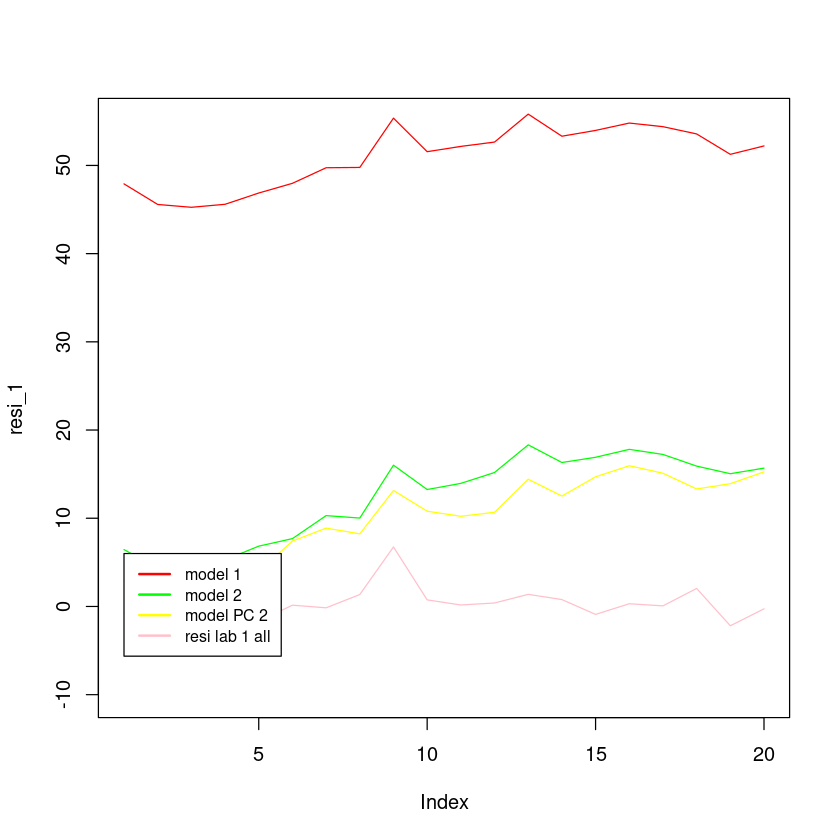

In [69]:
y_pred <- data_test$tomorrow_apd
resi_1 <-y_pred+predict_1
resi_2 <-y_pred+predict_2
PC_test <- princomp(data_test[,1:9],cor =  T)
data_X_test <- data.frame(PC_test$scores)
rownames(data_X_test) <- 1:nrow(data_X_test)
colnames(data_X_test) <- c('first','second','third','forth','5','6','7','8','9')

resi_PC2<-y_pred-predict(model_PC2,data_X_test)
resi_lab_1_all <- y_pred-predict(model_all,data_test)

plot(resi_1,type="l",col="red",ylim = c(-10,55))
lines(resi_2,col="green")
lines(resi_PC2,col="yellow")
lines(resi_lab_1_all,col="pink")
legend(1, 6, legend=c("model 1", "model 2",'model PC 2','resi lab 1 all'),
       col=c("red","green",'yellow','pink'),lwd =2,cex=0.8)

З графіка доволі очевидно, що найкраще прогнозує модель з першої лабораторної, а саме звичайна регресія.

Наша перша рідж регресія показує жахливі результати, як і будь-яка інша, що тренувалась на великих обємах в минулих лаборатоних ( через тренування на великих обємах даних, що нерелевантні, адже вартість акцій дуже сильно змінилась з тих пір).

Друга уже показує доволі непогані результати, що знаходяться недалеко від модель з головними компонентами.

Подивимось на метрики

In [73]:
library(Metrics)
cat('MAE:\nRidge_1: ',mae(y_pred,predict_1),
    '\nRidge_2 :',mae(y_pred,-predict_2),
     '\nPC_2 :',mae(y_pred,predict(model_PC2,data_X_test)),
   '\nmodel_all',mae(y_pred,predict(model_all,data_test)))


cat('\nMSE:\nRidge_1: ',mse(y_pred,-predict_1),
    '\nRidge_2 :',mse(y_pred,-predict_2),
     '\nPC_2 :',mse(y_pred,predict(model_PC2,data_X_test)),
   '\nmodel_all',mse(y_pred,predict(model_all,data_test)))


MAE:
Ridge_1:  155.0489 
Ridge_2 : 12.35646 
PC_2 : 9.787028 
model_all 1.175244
MSE:
Ridge_1:  2611.054 
Ridge_2 : 175.3668 
PC_2 : 120.3974 
model_all 3.466081

Дивлячись на метрики рідж регресія показує значно гірші результати порівняно з моделлю 2 головних компонент, а тим паче порівнюючи зі звичайною регресією

Коефіцієнти оптимальної моделі

In [85]:
df_result_2 <- data.frame(model_2$coef[,i_2]/model_2$scales)
inter <- as.vector((-t(coefs_2)%*%model_1$xm)+model_1$ym)
df_result_2 <- rbind(df_result_2,inter)
df_result_2

,model_2.coef...i_2..model_2.scales
,<dbl>
amgn,-0.077014316
amp,0.736451600
amt,0.067552461
amzn,-0.003177159
an,-0.464086955
anf,0.085524715
aon,-0.603058035
apa,0.064269339
apc,0.218678669


Значення параметра регуліризації, а також значення кросвалідації

In [78]:
model_2$GCV[i_2]

1.031 
0.03581887